In [493]:
import data_exploration_final as de
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import importlib
importlib.reload(de)

<module 'data_exploration_final' from '/Users/mariomoreno/Desktop/Grad School/Machine Learning/Homeworks/HW4/data_exploration_final.py'>

# 1) Load and Split the Data

In [446]:
unclean_outcomes = de.read_data('outcomes.csv', 0)

In [447]:
unclean_projects = de.read_data('projects.csv', 0)

In [448]:
unclean_outcomes.head()

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,ffffc4f85b60efc5b52347df489d0238,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
1,ffffac55ee02a49d1abc87ba6fc61135,f,f,t,t,f,t,f,f,57.0,0.0,7.0
2,ffff97ed93720407d70a2787475932b0,f,f,t,t,t,t,t,f,100.0,0.0,3.0
3,ffff418bb42fad24347527ad96100f81,f,f,f,t,t,f,f,f,100.0,0.0,1.0
4,ffff2d9c769c8fb5335e949c615425eb,t,t,t,t,t,f,t,f,63.0,6.0,2.0


Outcomes includes our label. In order to protect from leaking data from the future into my dataset, I will drop the other variables for this dataframe because these are things I would only know once my project has been funded. I wouldn't know this information at time of prediciton.

In [449]:
unclean_outcomes = unclean_outcomes.loc[:,['projectid','fully_funded']]
unclean_outcomes.head()

,projectid,fully_funded
0,ffffc4f85b60efc5b52347df489d0238,f
1,ffffac55ee02a49d1abc87ba6fc61135,t
2,ffff97ed93720407d70a2787475932b0,t
3,ffff418bb42fad24347527ad96100f81,f
4,ffff2d9c769c8fb5335e949c615425eb,t


In [450]:
unclean_projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,Books,highest poverty,Grades 3-5,30.0,576.07,677.73,12.0,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11


In [451]:
unclean_projects['date_posted'] = pd.to_datetime(unclean_projects['date_posted'])
unclean_projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,Books,highest poverty,Grades 3-5,30.0,576.07,677.73,12.0,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11


Make sure that our date variables are in date time format so we can cut this by date.

In [452]:
new_unclean_projects = (unclean_projects['date_posted'] > '2011-01-01') & (unclean_projects['date_posted'] <= '2013-12-31')

In [453]:
unclean_projects = unclean_projects.loc[new_unclean_projects]

In [454]:
unclean_projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
44772,62526d85d2a1818432d03d600969e99c,ebc7c90b6c92a069432e0714b8d93dfd,5aca9711ff0e4b37db48701f46f73036,1.713710e+11,41.972419,-88.174597,Bartlett,IL,60103.0,suburban,...,Other,moderate poverty,Grades 3-5,30.0,444.36,522.78,7.0,f,f,2013-12-31
44773,33d59ac771b80222ad63ef0f4ac47ade,de83b4c1f6428a15032c207c1d5e572a,d91a805b213bf74ae77b94e0de2b73ad,1.601530e+11,43.501154,-112.056780,Idaho Falls,ID,83402.0,urban,...,Supplies,high poverty,Grades 3-5,30.0,233.24,274.40,30.0,f,f,2013-12-31
44774,1a3aaeffc56dd2a421e37d8298024c0a,f4c9ed095b85458dcf858e25f203af00,9310d3eb447a4e46bc5fc31ed007ceac,3.302610e+11,42.888244,-71.320224,Derry,NH,3038.0,suburban,...,Technology,moderate poverty,Grades 6-8,30.0,285.09,335.40,230.0,f,f,2013-12-31
44775,33aa19ee4da4c5adf47d0dfb84fab5ef,17768031eb40de8d4497dbb54df48742,9ac70da58322783f82152eecc140a812,5.103240e+11,37.476158,-77.488397,Richmond,VA,23224.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,232.94,274.05,18.0,f,f,2013-12-31
44776,e31c0ea8b68f404699dfb0d39e9bc99b,0f1bc5b4700fd33383be104442660178,cb9f688cf59e3ee22a087d616ca8f5d7,1.709930e+11,41.952851,-87.650233,Chicago,IL,60613.0,urban,...,Supplies,highest poverty,Grades 6-8,30.0,513.41,604.01,70.0,t,f,2013-12-31


We've identified the projects that occur within the specified dates, now we need to join them with outcomes on projectid. 

In [455]:
merged = pd.merge(unclean_projects, unclean_outcomes, on = 'projectid')
merged.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted,fully_funded
0,62526d85d2a1818432d03d600969e99c,ebc7c90b6c92a069432e0714b8d93dfd,5aca9711ff0e4b37db48701f46f73036,1.713710e+11,41.972419,-88.174597,Bartlett,IL,60103.0,suburban,...,moderate poverty,Grades 3-5,30.0,444.36,522.78,7.0,f,f,2013-12-31,t
1,33d59ac771b80222ad63ef0f4ac47ade,de83b4c1f6428a15032c207c1d5e572a,d91a805b213bf74ae77b94e0de2b73ad,1.601530e+11,43.501154,-112.056780,Idaho Falls,ID,83402.0,urban,...,high poverty,Grades 3-5,30.0,233.24,274.40,30.0,f,f,2013-12-31,f
2,1a3aaeffc56dd2a421e37d8298024c0a,f4c9ed095b85458dcf858e25f203af00,9310d3eb447a4e46bc5fc31ed007ceac,3.302610e+11,42.888244,-71.320224,Derry,NH,3038.0,suburban,...,moderate poverty,Grades 6-8,30.0,285.09,335.40,230.0,f,f,2013-12-31,f
3,33aa19ee4da4c5adf47d0dfb84fab5ef,17768031eb40de8d4497dbb54df48742,9ac70da58322783f82152eecc140a812,5.103240e+11,37.476158,-77.488397,Richmond,VA,23224.0,urban,...,highest poverty,Grades PreK-2,30.0,232.94,274.05,18.0,f,f,2013-12-31,f
4,e31c0ea8b68f404699dfb0d39e9bc99b,0f1bc5b4700fd33383be104442660178,cb9f688cf59e3ee22a087d616ca8f5d7,1.709930e+11,41.952851,-87.650233,Chicago,IL,60613.0,urban,...,highest poverty,Grades 6-8,30.0,513.41,604.01,70.0,t,f,2013-12-31,t



Summary stats for projectid
count                               352790
unique                              352790
top       200cc738675ba3f73f06c2454f37f42f
freq                                     1
Name: projectid, dtype: object


Summary stats for teacher_acctid
count                               352790
unique                              157056
top       214acf23d183dfa2f1dc16e7b3658320
freq                                   174
Name: teacher_acctid, dtype: object


Summary stats for schoolid
count                               352790
unique                               44808
top       9943fdb43ab5f2b53f27e961caf9e90a
freq                                   476
Name: schoolid, dtype: object


Summary stats for school_ncesid
count    3.279590e+05
mean     2.502985e+11
std      1.648287e+11
min      1.000050e+10
25%      6.372001e+10
50%      2.400090e+11
75%      3.904440e+11
max      6.100008e+11
Name: school_ncesid, dtype: float64


Summary stats for school_latitude
count    352

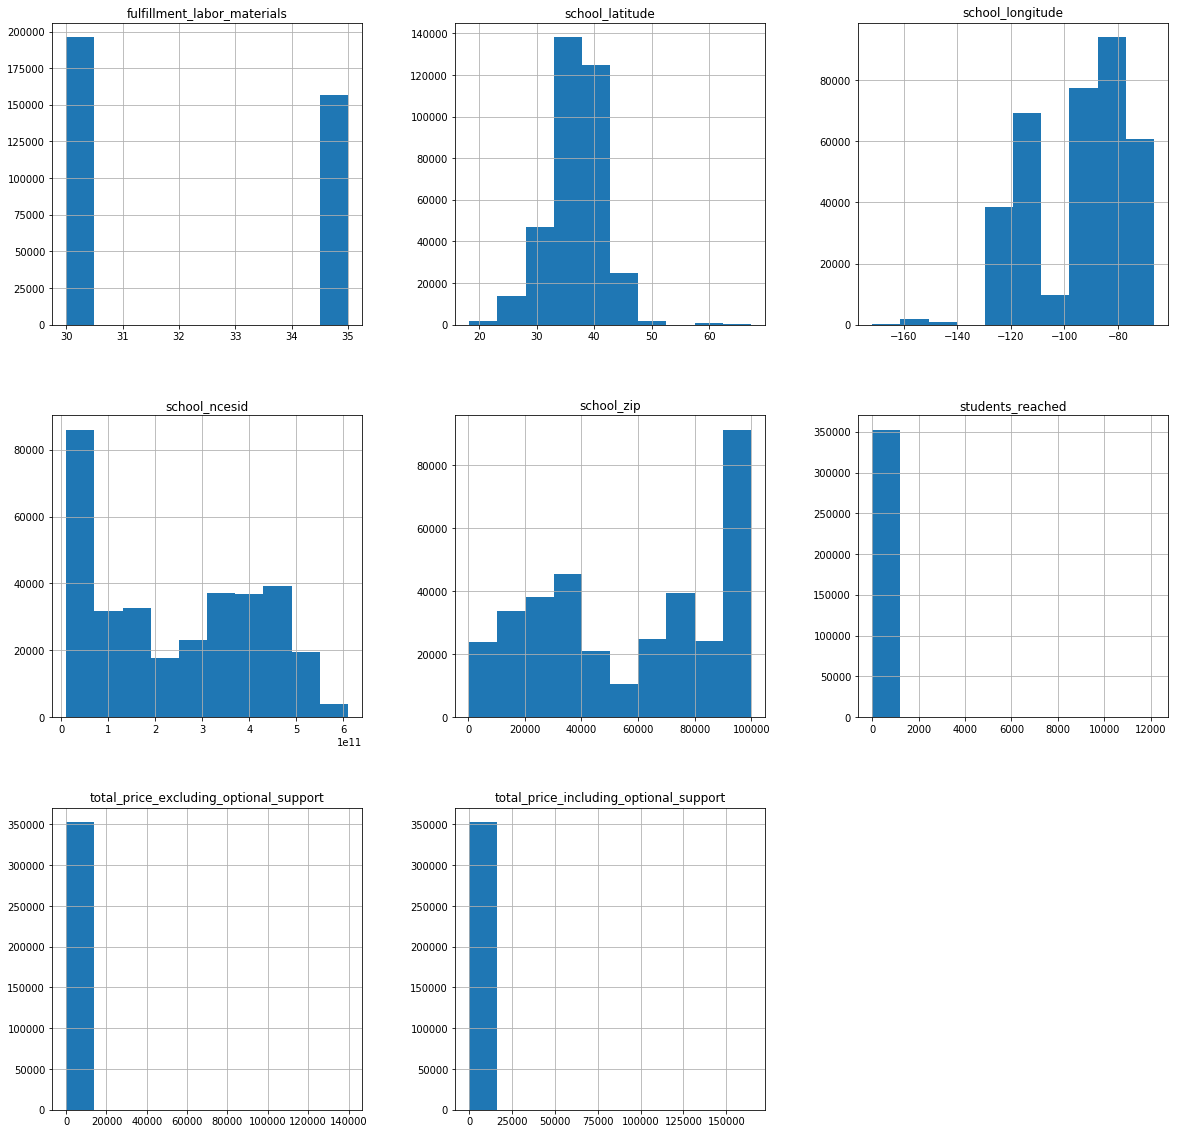

In [456]:
de.explore_data(merged)

Before splitting my data, I'll need to fill nulls, create a whole range of dummies for variables that aren't currently integers, and do some light cleaning of the data. Some thoughts:

- All features with True or False as variables need to be turned into 1 or 0. Those include: eligible_almost_home_match, eligible_double_your_impact_match, teacher_ny_teaching_fellow, teacher_teach_for_america, school_charter_ready_promise, school_kipp, school_nlns, school_year_round, and school_charter. 
- There are several features here that I might need to control for: I'll get rid of city, county, and school district in favor of zip code and metro information.
- For features with values that aren't integers, there is a need to dummify those features across multiple columns. 
- No outliers immediately stand out, so I won't do anything on that front yet.

In [457]:
cols = ['eligible_almost_home_match', 'eligible_double_your_impact_match', 'teacher_ny_teaching_fellow', 'teacher_teach_for_america', 'school_charter_ready_promise', 'school_kipp', 'school_nlns', 'school_year_round', 'school_charter', 'fully_funded'] 
de.true_to_false(merged, cols)

In [458]:
to_dummy = ['school_metro','primary_focus_subject', 'primary_focus_area', 'secondary_focus_subject', 'secondary_focus_area', 'resource_type', 'poverty_level', 'grade_level']
new_df = de.dummify(merged, to_dummy)

In [459]:
new_df.shape

(352790, 121)

After merging the two datasets on project id, I will now split into test and train models across the timeframes I want to test and train over.  

Since I am predicting probability that a project will be funded in six months from time of posting, I will create test-train splits as follows:

- train data from 2011-01-01 to 2011-12-31, test through 2012-01-01 to 2012-07-01
- train data from 2011-01-01 to 2012-06-30, test on 2012-07-01 to 2012-12-31
- train data on 2011-01-01 to 2012-12-31, test on 2013-01-01 to 2013-06-30
- train data on 2011-01-01 to 2013-06-30, test on 2013-07-01 to 2013-12-31

In [460]:
date_ranges = {('2011-01-01', '2011-12-31'):('2012-01-01', '2012-06-30'), ('2011-01-01', '2012-06-30'):('2012-07-01','2012-12-31'), ('2011-01-01', '2012-12-31'):('2013-01-01', '2013-06-30'), ('2011-01-01', '2013-06-30'):('2013-07-01', '2013-12-31')}
train_test_lists = de.split_data(new_df, 'fully_funded_new', None, True, 'date_posted', date_ranges)

# 2) Data Exploration and Features for Each Train and Test Dataframe

In [465]:
train_test_one = train_test_lists[0]
train_test_two = train_test_lists[1]
train_test_three = train_test_lists[2]
train_test_final = train_test_lists[3]

In [466]:
train_test_one[0].shape

(103835, 120)

------ Analysis for X Training Set ------

Summary stats for projectid
count                               103835
unique                              103835
top       6cc73cc4c5000868c27dc7a39cb64b14
freq                                     1
Name: projectid, dtype: object


Summary stats for teacher_acctid
count                               103835
unique                               56950
top       5b1935ec602f0b469f3f7109ccf5a349
freq                                    73
Name: teacher_acctid, dtype: object


Summary stats for schoolid
count                               103835
unique                               23953
top       0b835c84c45b3c56d42967c77c1ff310
freq                                   244
Name: schoolid, dtype: object


Summary stats for school_ncesid
count    9.759900e+04
mean     2.624208e+11
std      1.647767e+11
min      1.000050e+10
25%      1.001300e+11
50%      2.612000e+11
75%      4.020250e+11
max      6.100008e+11
Name: school_ncesid, dtype: float64


Summ


Summary stats for primary_focus_subject_Civics & Government
count    103835.000000
mean          0.003438
std           0.058535
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: primary_focus_subject_Civics & Government, dtype: float64


Summary stats for primary_focus_subject_College & Career Prep
count    103835.000000
mean          0.008745
std           0.093103
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: primary_focus_subject_College & Career Prep, dtype: float64


Summary stats for primary_focus_subject_Community Service
count    103835.000000
mean          0.002051
std           0.045245
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: primary_focus_subject_Community Service, dtype: float64


Summary stats for primary_focus_subject_ESL
count    103835.000000
me


Summary stats for secondary_focus_subject_Early Development
count    103835.000000
mean          0.032446
std           0.177182
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: secondary_focus_subject_Early Development, dtype: float64


Summary stats for secondary_focus_subject_Economics
count    103835.000000
mean          0.001984
std           0.044497
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: secondary_focus_subject_Economics, dtype: float64


Summary stats for secondary_focus_subject_Environmental Science
count    103835.000000
mean          0.024886
std           0.155777
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: secondary_focus_subject_Environmental Science, dtype: float64


Summary stats for secondary_focus_subject_Extracurricular
count    103835.000

count    103835.000000
mean          0.217595
std           0.412613
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: resource_type_Books, dtype: float64


Summary stats for resource_type_Other
count    103835.000000
mean          0.116858
std           0.321253
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: resource_type_Other, dtype: float64


Summary stats for resource_type_Supplies
count    103835.000000
mean          0.344441
std           0.475188
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: resource_type_Supplies, dtype: float64


Summary stats for resource_type_Technology
count    103835.000000
mean          0.317176
std           0.465379
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: r

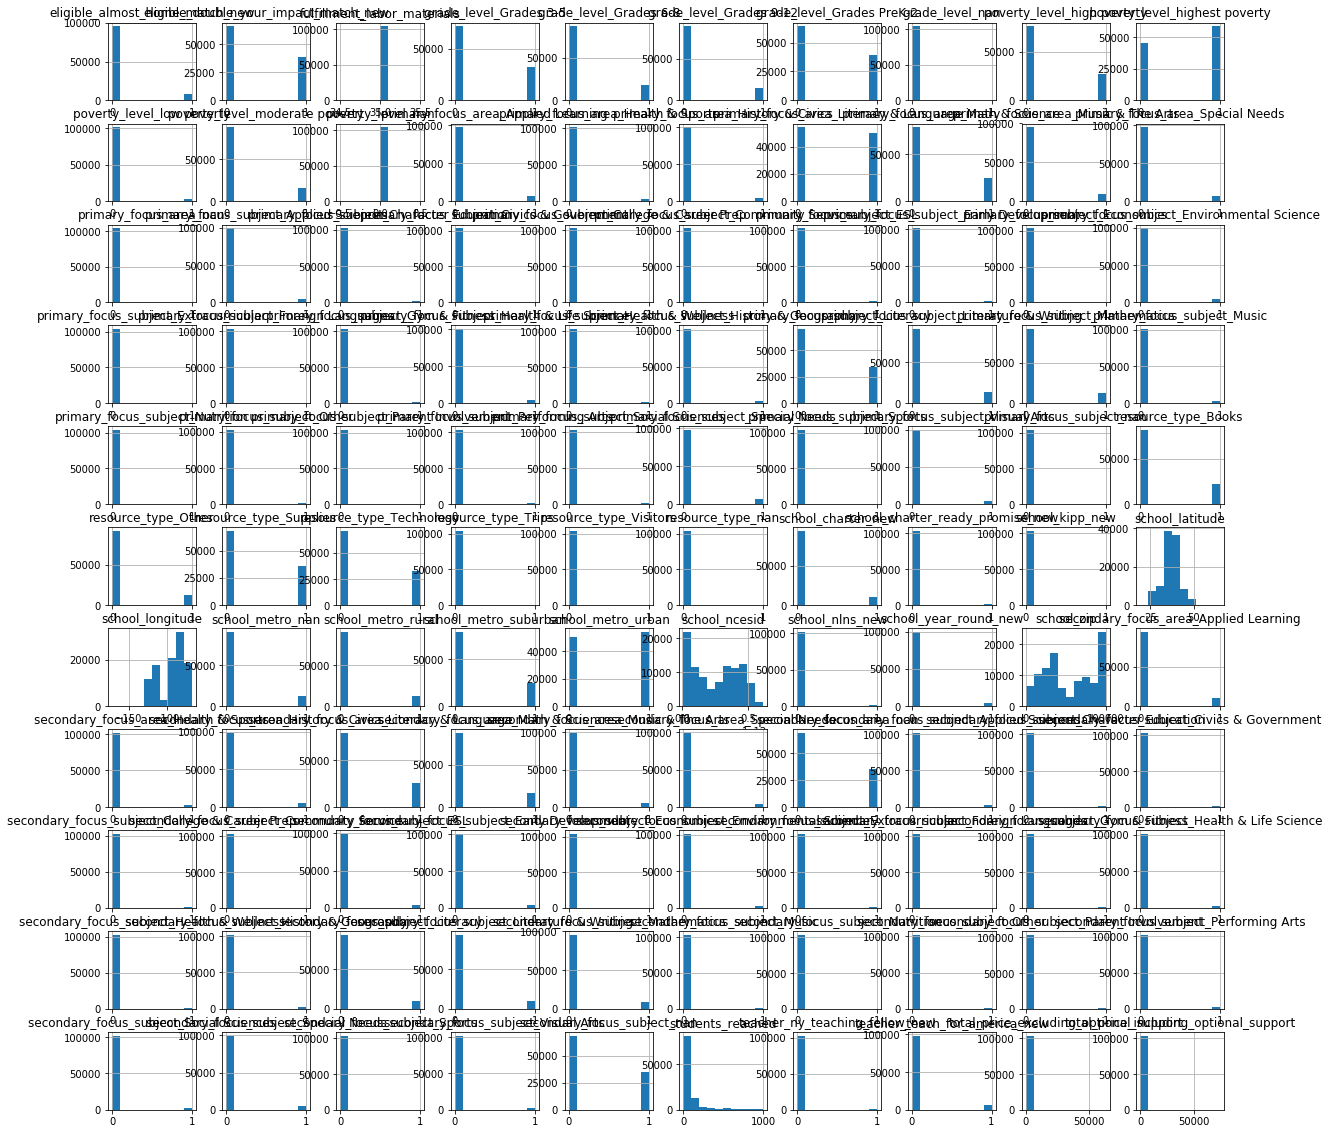

------ Analysis for Y Training Set ------

Summary stats for projectid
count                                51834
unique                               51834
top       6f7b90d76f49b0c3287e9c81d6467ae0
freq                                     1
Name: projectid, dtype: object


Summary stats for teacher_acctid
count                                51834
unique                               32181
top       3a08369b8098f16b94e13ce295f9a814
freq                                    48
Name: teacher_acctid, dtype: object


Summary stats for schoolid
count                                51834
unique                               14939
top       a207bb5cd9c14947bdc8b9d3f1231b9a
freq                                   165
Name: schoolid, dtype: object


Summary stats for school_ncesid
count    4.863200e+04
mean     2.155498e+11
std      1.649666e+11
min      1.000050e+10
25%      6.227100e+10
50%      1.709420e+11
75%      3.606878e+11
max      5.900126e+11
Name: school_ncesid, dtype: float64


Summ

count    51834.000000
mean         0.006849
std          0.082474
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: secondary_focus_subject_Civics & Government, dtype: float64


Summary stats for secondary_focus_subject_College & Career Prep
count    51834.000000
mean         0.012135
std          0.109489
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: secondary_focus_subject_College & Career Prep, dtype: float64


Summary stats for secondary_focus_subject_Community Service
count    51834.000000
mean         0.004785
std          0.069005
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: secondary_focus_subject_Community Service, dtype: float64


Summary stats for secondary_focus_subject_ESL
count    51834.000000
mean         0.040919
std          0.198105
min          0.000000
25%       

Summary stats for grade_level_Grades 3-5
count    51834.000000
mean         0.307848
std          0.461608
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: grade_level_Grades 3-5, dtype: float64


Summary stats for grade_level_Grades 6-8
count    51834.000000
mean         0.166435
std          0.372474
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: grade_level_Grades 6-8, dtype: float64


Summary stats for grade_level_Grades 9-12
count    51834.000000
mean         0.131130
std          0.337546
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: grade_level_Grades 9-12, dtype: float64


Summary stats for grade_level_Grades PreK-2
count    51834.000000
mean         0.394548
std          0.488758
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max     

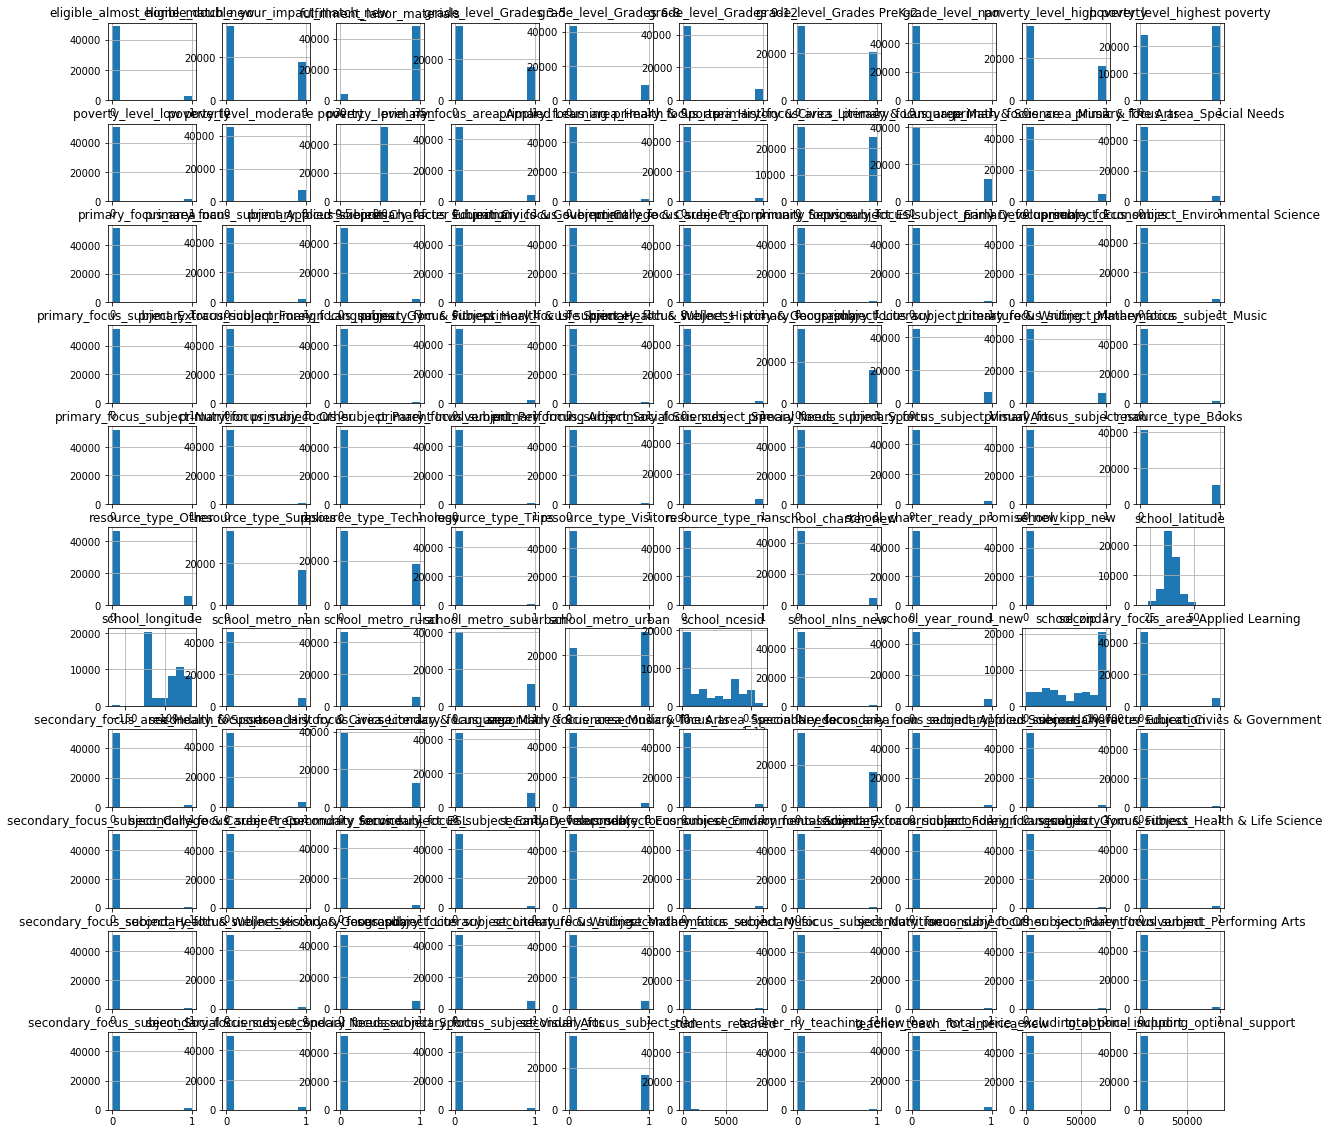

In [467]:
de.analyze_split_data(train_test_one[0], train_test_one[2])

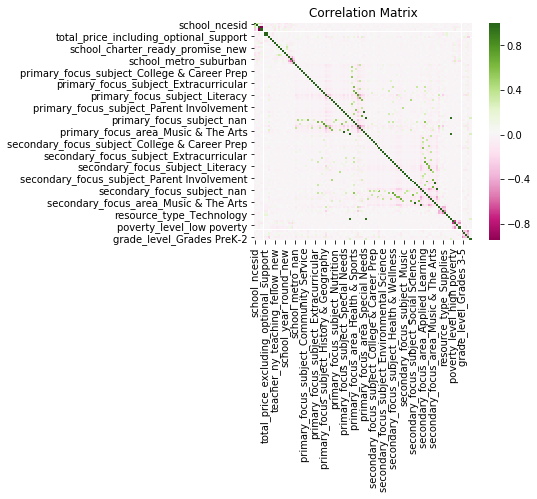

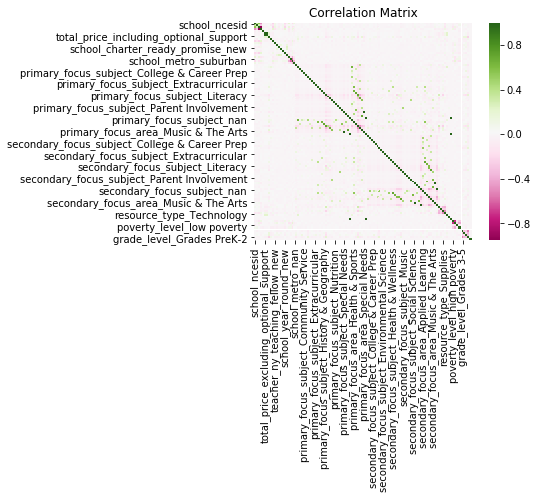

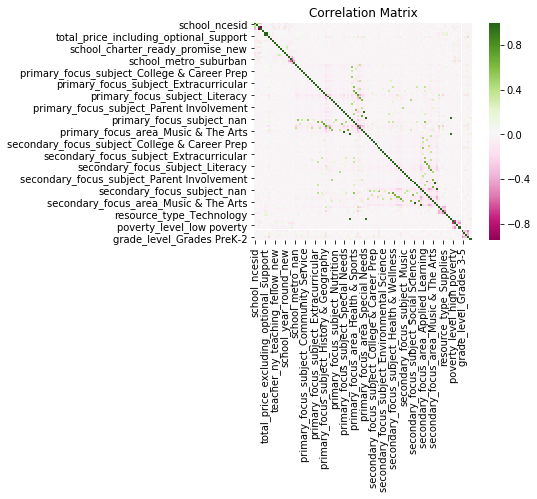

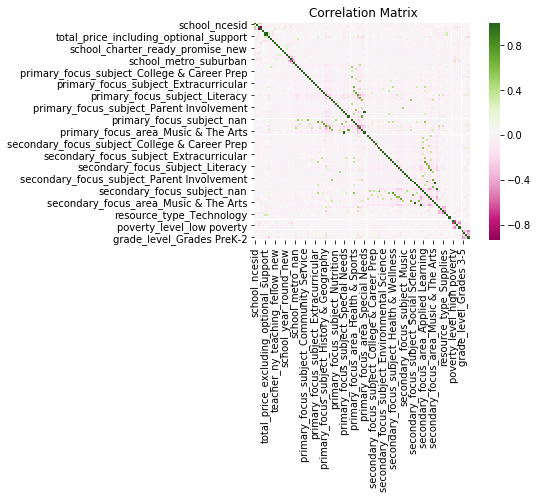

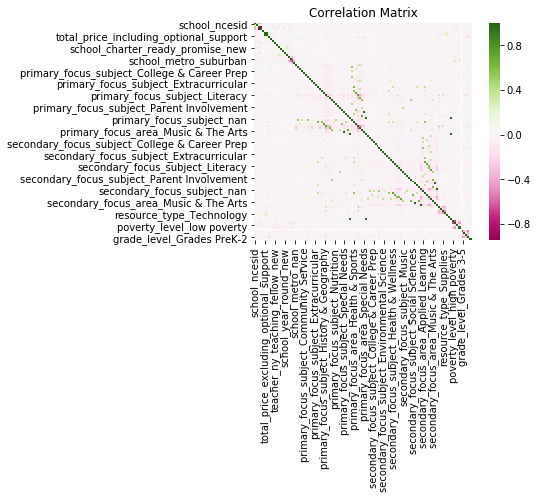

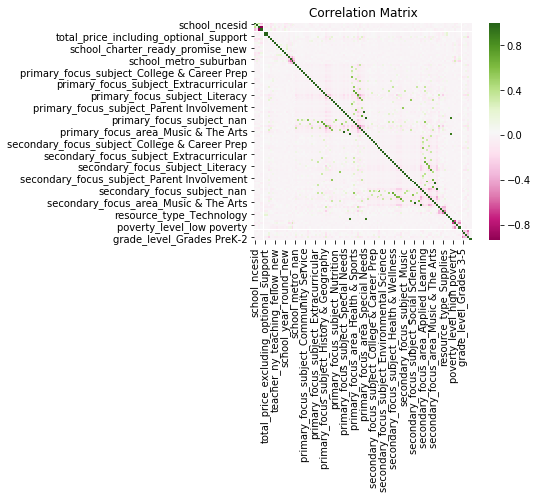

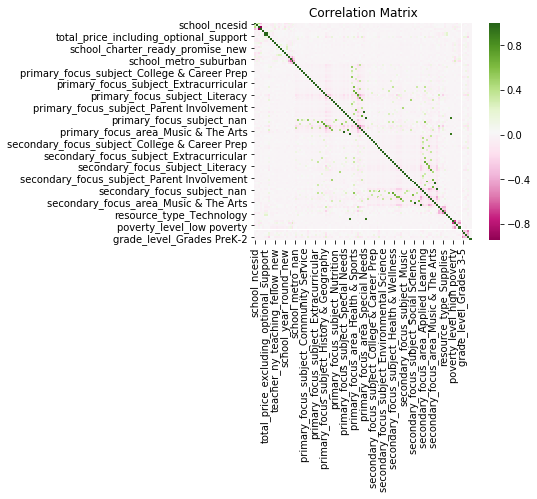

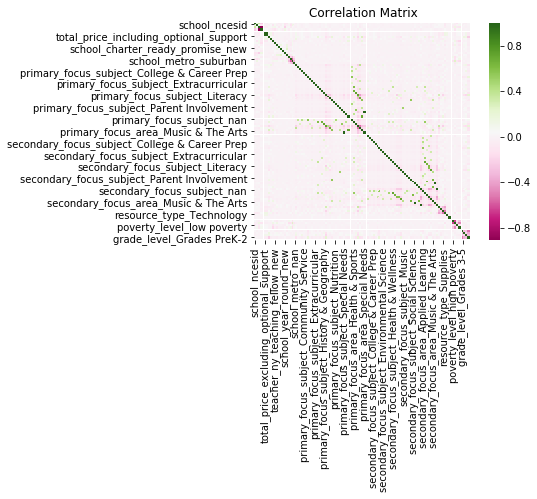

In [471]:
for t in train_test_lists:
    de.explore_potential_correlations(t[0])
    de.explore_potential_correlations(t[2])

In [472]:
for tr in train_test_lists:
    de.nulls(tr[0])
    de.nulls(tr[2])

Values with True have nulls
projectid                                   False
teacher_acctid                              False
schoolid                                    False
school_ncesid                                True
school_latitude                             False
school_longitude                            False
school_city                                 False
school_state                                False
school_zip                                  False
school_district                              True
school_county                               False
school_magnet                               False
teacher_prefix                              False
fulfillment_labor_materials                 False
total_price_excluding_optional_support      False
total_price_including_optional_support      False
students_reached                             True
date_posted                                 False
eligible_almost_home_match_new              False
eligible_double_your_i

projectid                                   False
teacher_acctid                              False
schoolid                                    False
school_ncesid                                True
school_latitude                             False
school_longitude                            False
school_city                                 False
school_state                                False
school_zip                                  False
school_district                              True
school_county                               False
school_magnet                               False
teacher_prefix                              False
fulfillment_labor_materials                 False
total_price_excluding_optional_support      False
total_price_including_optional_support      False
students_reached                             True
date_posted                                 False
eligible_almost_home_match_new              False
eligible_double_your_impact_match_new       False


projectid                                   False
teacher_acctid                              False
schoolid                                    False
school_ncesid                                True
school_latitude                             False
school_longitude                            False
school_city                                 False
school_state                                False
school_zip                                  False
school_district                              True
school_county                               False
school_magnet                               False
teacher_prefix                              False
fulfillment_labor_materials                 False
total_price_excluding_optional_support      False
total_price_including_optional_support      False
students_reached                            False
date_posted                                 False
eligible_almost_home_match_new              False
eligible_double_your_impact_match_new       False


Several issues here:
- Need to impute some nulls, I'll impute students_reached with the median.
- Some variables to delete: school ncesid, school lat, school long, school city, school state, school district, school county. These are all locations that are hard to dummify, so I'll rely on zip code and metro status to provide me locations
- Hard to tell correlations between variables. If there's time, I'll dive down and look at specific correlations that I suspect.

In [478]:
nulls_d = {'students_reached': 'median'}
delv = ['school_ncesid', 'school_latitude', 'school_longitude', 'school_city', 'school_state', 'school_district', 'school_county']
for tup in train_test_lists:
    de.clean_data(tup[0], nulls_d, [], [], delv)
    de.clean_data(tup[2], nulls_d, [], [], delv)

/Users/mariomoreno/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


# 3) Let's Answer Some Questions

How many projects are funded in our largest training set?

Are most projects funded in metro, rural, or other areas?

Which economic group are most projects targeting?

Are certain subjects preferred over others?